## Import all library

In [527]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model

### Read CSV File

In [486]:
df=pd.read_csv(r'Downloads/Churn.csv')

In [487]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [489]:
df.shape

(7043, 21)

In [490]:
df.size

147903

In [491]:
temp=pd.DataFrame(index=df.columns)
temp['Data_Types']=df.dtypes
temp['Null_Counts']=df.isnull().sum()/len(df)*100
temp['Unique_Counts'] = df.nunique()

In [492]:
temp

,Data_Types,Null_Counts,Unique_Counts
customerID,object,0.0,7043
gender,object,0.0,2
SeniorCitizen,int64,0.0,2
Partner,object,0.0,2
Dependents,object,0.0,2
tenure,int64,0.0,73
PhoneService,object,0.0,2
MultipleLines,object,0.0,3
InternetService,object,0.0,3
OnlineSecurity,object,0.0,3


In [493]:
## Convert Data Types of "TotalCharges from object to float"
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [494]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [495]:
## Filling the missing value of TotalCharges by its mean value.
df['TotalCharges'].fillna((df['TotalCharges'].mean()),inplace=True)

<AxesSubplot:>

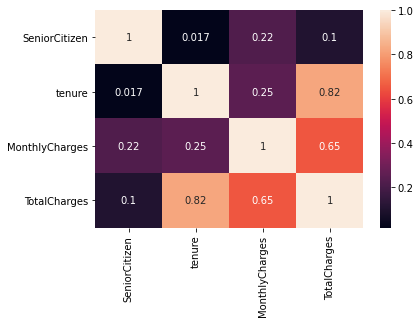

In [496]:
## Correaltion between data
sns.heatmap(df.corr(),annot=True)

In [497]:
df.drop('customerID',inplace=True,axis=1)

In [498]:
for i in df.columns:
    if df[i].dtypes=='object':
        print(df.groupby(i)['Churn'].value_counts())

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: Churn, dtype: int64
Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
Name: Churn, dtype: int64
Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1784
            Yes       326
Name: Churn, dtype: int64
PhoneService  Churn
No            No        512
              Yes       170
Yes           No       4662
              Yes      1699
Name: Churn, dtype: int64
MultipleLines     Churn
No                No       2541
                  Yes       849
No phone service  No        512
                  Yes       170
Yes               No       2121
                  Yes       850
Name: Churn, dtype: int64
InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
             

In [499]:
df.groupby('SeniorCitizen')['Churn'].value_counts()

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: Churn, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

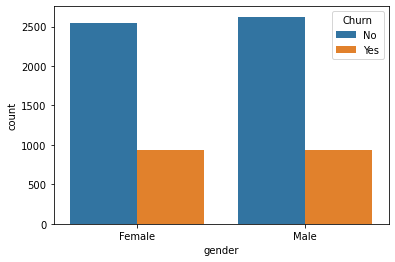

In [500]:
sns.countplot('gender',hue='Churn',data=df)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

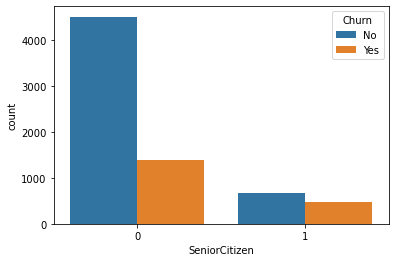

In [501]:
sns.countplot('SeniorCitizen',hue='Churn',data=df)

<AxesSubplot:xlabel='Partner', ylabel='count'>

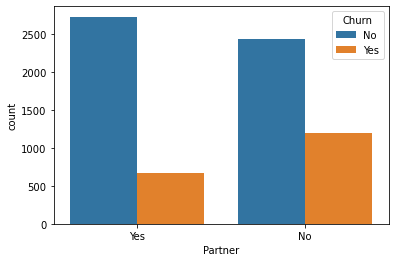

In [502]:
sns.countplot('Partner',hue='Churn',data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

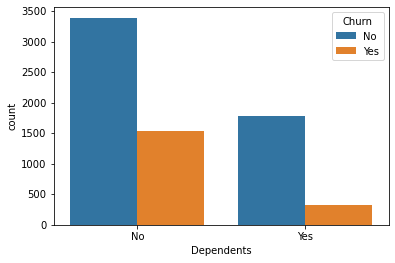

In [503]:
sns.countplot('Dependents',hue='Churn',data=df)

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

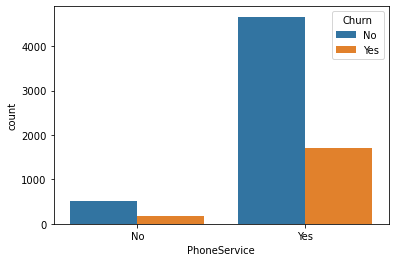

In [504]:
sns.countplot('PhoneService',hue='Churn',data=df)

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

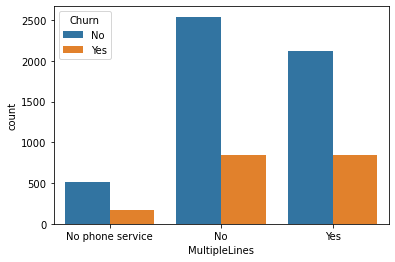

In [505]:
sns.countplot('MultipleLines',hue='Churn',data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

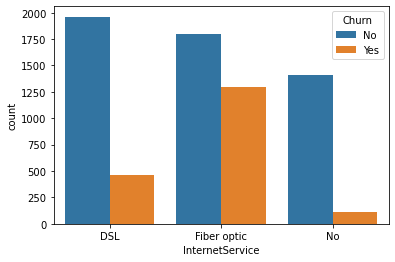

In [506]:
sns.countplot('InternetService',hue='Churn',data=df)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

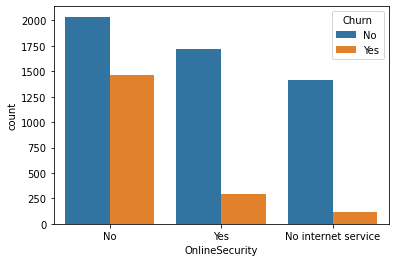

In [507]:
sns.countplot('OnlineSecurity',hue='Churn',data=df)

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

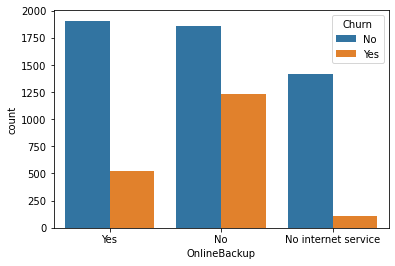

In [508]:
sns.countplot('OnlineBackup',hue='Churn',data=df)

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

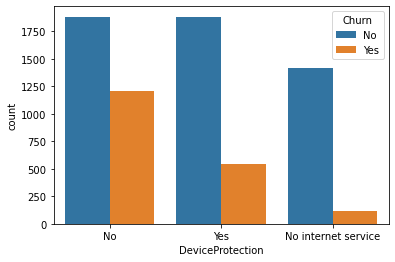

In [509]:
sns.countplot('DeviceProtection',hue='Churn',data=df)

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

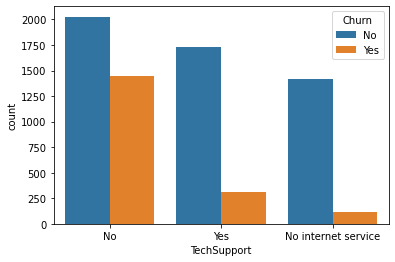

In [510]:
sns.countplot('TechSupport',hue='Churn',data=df)

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

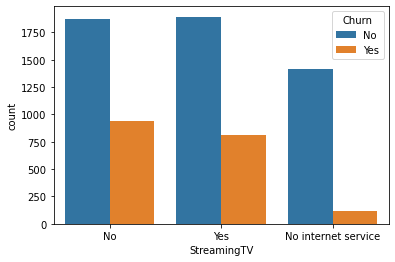

In [511]:
sns.countplot('StreamingTV',hue='Churn',data=df)

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

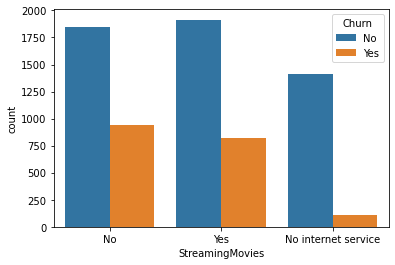

In [512]:
sns.countplot('StreamingMovies',hue='Churn',data=df)

<AxesSubplot:xlabel='Contract', ylabel='count'>

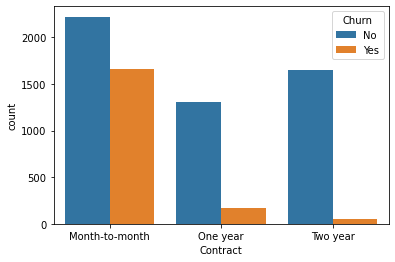

In [513]:
sns.countplot('Contract',hue='Churn',data=df)

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

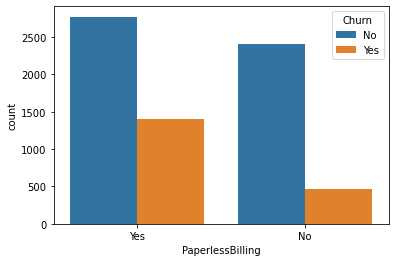

In [514]:
sns.countplot('PaperlessBilling',hue='Churn',data=df)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

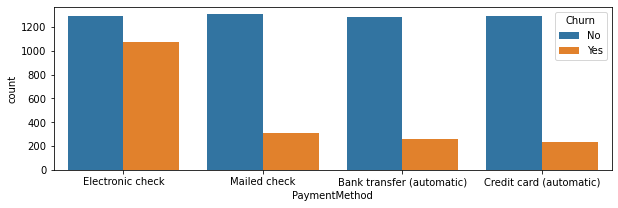

In [515]:
plt.figure(figsize=(10,3))
sns.countplot('PaymentMethod',hue='Churn',data=df)

In [516]:
dic={'Yes': 1,'No': 0}
df.replace({'Churn':dic},inplace = True)


<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

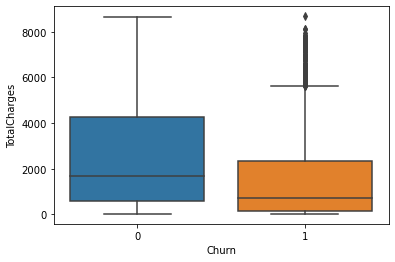

In [517]:
sns.boxplot(x='Churn',y='TotalCharges',data=df)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

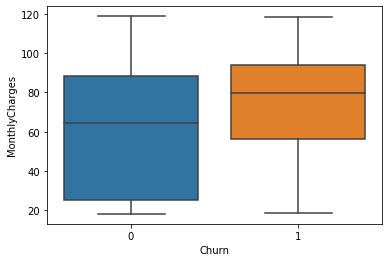

In [518]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

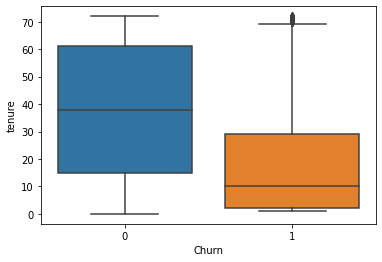

In [519]:
sns.boxplot(x='Churn',y='tenure',data=df)

## Scaling Numerical Features for Logistic Regression

In [520]:

num_cols = ['MonthlyCharges','TotalCharges','tenure']
for i in num_cols:
    df[i] = np.log(df[i] + 17000)

std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [521]:
df_df_og = df.copy()
df = df.drop(columns = num_cols,axis = 1)
df = df.merge(scaled,left_index=True,right_index=True,how = "left")

## Dummies with Multiple Categories

In [522]:
# Convert occupation to one hot encoded features
df = pd.concat([df,pd.get_dummies(df['MultipleLines'],prefix = str('MultipleLines'),prefix_sep='_')],axis = 1)
df = pd.concat([df,pd.get_dummies(df['InternetService'],prefix = str('InternetService'),prefix_sep='_')],axis = 1)
df = pd.concat([df,pd.get_dummies(df['OnlineSecurity'],prefix = str('OnlineSecurity'),prefix_sep='_')],axis = 1)
df = pd.concat([df,pd.get_dummies(df['OnlineBackup'],prefix = str('OnlineBackup'),prefix_sep='_')],axis = 1)
df = pd.concat([df,pd.get_dummies(df['DeviceProtection'],prefix = str('DeviceProtection'),prefix_sep='_')],axis = 1)
df = pd.concat([df,pd.get_dummies(df['TechSupport'],prefix = str('TechSupport'),prefix_sep='_')],axis = 1)
df = pd.concat([df,pd.get_dummies(df['StreamingTV'],prefix = str('StreamingTV'),prefix_sep='_')],axis = 1)
df = pd.concat([df,pd.get_dummies(df['StreamingMovies'],prefix = str('StreamingMovies'),prefix_sep='_')],axis = 1)
df = pd.concat([df,pd.get_dummies(df['Contract'],prefix = str('Contract'),prefix_sep='_')],axis = 1)
df = pd.concat([df,pd.get_dummies(df['PaymentMethod'],prefix = str('PaymentMethod'),prefix_sep='_')],axis = 1)

In [523]:
y = df.Churn
df = df.drop(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 
             'StreamingTV', 'StreamingMovies','Contract','PaymentMethod','Churn'],axis = 1)

In [524]:
dic={'Male': 1,'Female': 0}
df.replace({'gender':dic},inplace = True)
dic1={'Yes': 1,'No': 0}
df.replace({'Partner':dic1},inplace = True)
df.replace({'Dependents':dic1},inplace = True)
df.replace({'PaperlessBilling':dic1},inplace = True)
df.replace({'PhoneService':dic1},inplace = True)

## Train Test Split to create a validation set

In [525]:
xtrain, xtest, ytrain, ytest = train_test_split(df,y,test_size=1/3, random_state=11, stratify = y)

## Stochastic Gradient Descent (SGD):

In [528]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(xtrain, ytrain)
Y_pred = sgd.predict(xtest)

sgd.score(xtrain, ytrain)

acc_sgd = round(sgd.score(xtrain, ytrain) * 100, 2)

## Random Forest:

In [529]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(xtrain, ytrain)

Y_prediction = random_forest.predict(xtest)

random_forest.score(xtrain, ytrain)
acc_random_forest = round(random_forest.score(xtrain, ytrain) * 100, 2)

## Logistic Regression:

In [530]:
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

Y_pred = logreg.predict(xtest)

acc_log = round(logreg.score(xtrain, ytrain) * 100, 2)

## K Nearest Neighbor:

In [533]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(xtrain, ytrain) 
Y_pred = knn.predict(xtest)  
acc_knn = round(knn.score(xtrain, ytrain) * 100, 2)

## Gaussian Naive Bayes:

In [534]:
gaussian = GaussianNB()
gaussian.fit(xtrain, ytrain)
Y_pred = gaussian.predict(xtest) 
acc_gaussian = round(gaussian.score(xtrain, ytrain) * 100, 2)

## Perceptron:

In [535]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(xtrain, ytrain)

Y_pred = perceptron.predict(xtest)

acc_perceptron = round(perceptron.score(xtrain, ytrain) * 100, 2)

## Linear Support Vector Machine:

In [536]:
linear_svc = LinearSVC()
linear_svc.fit(xtrain, ytrain)

Y_pred = linear_svc.predict(xtest)

acc_linear_svc = round(linear_svc.score(xtrain, ytrain) * 100, 2)

## Decision Tree

In [538]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(xtrain, ytrain)  
Y_pred = decision_tree.predict(xtest)  
acc_decision_tree = round(decision_tree.score(xtrain, ytrain) * 100, 2)

## Best Model

In [539]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
99.79,Random Forest
99.79,Decision Tree
86.11,KNN
80.77,Support Vector Machines
80.75,Logistic Regression
77.96,Perceptron
68.75,Naive Bayes
64.49,Stochastic Gradient Decent


In [541]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, xtrain, ytrain, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79361702 0.74255319 0.80425532 0.8212766  0.8106383  0.80383795
 0.7761194  0.79957356 0.78678038 0.75266525]
Mean: 0.7891316971374133
Standard Deviation: 0.023967028843705617


In [543]:
importances = pd.DataFrame({'feature':xtrain.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
TotalCharges,0.176
MonthlyCharges,0.147
tenure,0.141
Contract_Month-to-month,0.049
OnlineSecurity_No,0.033
TechSupport_No,0.030
PaymentMethod_Electronic check,0.029
gender,0.028
InternetService_Fiber optic,0.027


In [545]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(xtrain, ytrain)
Y_prediction = random_forest.predict(xtest)

random_forest.score(xtrain, ytrain)

acc_random_forest = round(random_forest.score(xtrain, ytrain) * 100, 2)
print(round(acc_random_forest,2,), "%")

99.77 %


## AUC ROC Curve & Confusion Matrix

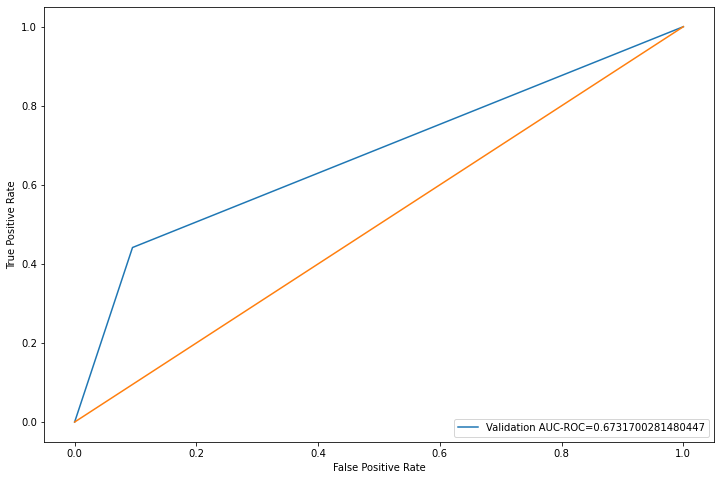

In [546]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,Y_prediction) 
auc = roc_auc_score(ytest, Y_prediction) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [547]:
# Confusion Matrix
Y_prediction = random_forest.predict(xtest)

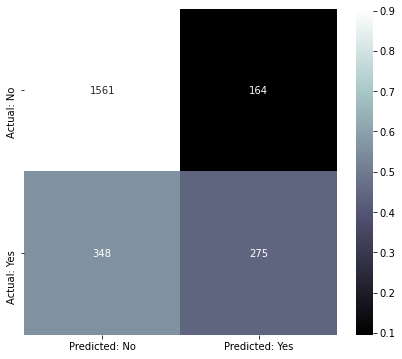

In [548]:
label_preds = Y_prediction

cm = confusion_matrix(ytest,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

In [549]:
# Recall Score
recall_score(ytest,Y_prediction)

0.44141252006420545

## Cross validation

In [553]:
def cv_score(ml_model, rstate = 12, thres = 0.5, cols = df.columns):
    i = 1
    cv_scores = []
    df1 = df.copy()
    df1 = df[cols]
    
    # 5 Fold cross validation stratified on the basis of target
    kf = StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for df_index,test_index in kf.split(df1,y):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = df1.loc[df_index],df1.loc[test_index]
        ytr,yvl = y.loc[df_index],y.loc[test_index]
            
        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(xtr, ytr)
        pred_probs = model.predict_proba(xvl)
        pp = []
         
        # Use threshold to define the classes based on probability values
        for j in pred_probs[:,1]:
            if j>thres:
                pp.append(1)
            else:
                pp.append(0)
         
        # Calculate scores for each fold and print
        Y_prediction = pp
        roc_score = roc_auc_score(yvl,pred_probs[:,1])
        recall = recall_score(yvl,Y_prediction)
        precision = precision_score(yvl,Y_prediction)
        sufix = ""
        msg = ""
        msg += "ROC AUC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f} ".format(roc_score, recall,precision)
        print("{}".format(msg))
         
         # Save scores
        cv_scores.append(roc_score)
        i+=1
    return cv_scores

In [554]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'tenure',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit 

In [556]:
scores = cv_score(RandomForestClassifier(), cols = df.columns)


1 of kfold 5
ROC AUC Score: 0.8267444263607947, Recall Score: 0.5080, Precision Score: 0.6507 

2 of kfold 5
ROC AUC Score: 0.8071727505231342, Recall Score: 0.4786, Precision Score: 0.5967 

3 of kfold 5
ROC AUC Score: 0.8168617117466224, Recall Score: 0.4759, Precision Score: 0.6159 

4 of kfold 5
ROC AUC Score: 0.8486808874383183, Recall Score: 0.4638, Precision Score: 0.6838 

5 of kfold 5
ROC AUC Score: 0.8258748021804115, Recall Score: 0.5241, Precision Score: 0.6262 


In [557]:
all_feat_scores = cv_score(RandomForestClassifier())


1 of kfold 5
ROC AUC Score: 0.8293562220672195, Recall Score: 0.5134, Precision Score: 0.6667 

2 of kfold 5
ROC AUC Score: 0.8105104755999897, Recall Score: 0.4893, Precision Score: 0.6040 

3 of kfold 5
ROC AUC Score: 0.8120049600868016, Recall Score: 0.4733, Precision Score: 0.6103 

4 of kfold 5
ROC AUC Score: 0.8428086671588245, Recall Score: 0.4450, Precision Score: 0.7034 

5 of kfold 5
ROC AUC Score: 0.8208827666814924, Recall Score: 0.5053, Precision Score: 0.6197 


In [558]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 78.17 %


## Implementing decision tree classifier

In [635]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=10,max_leaf_nodes=25)
dt_model.fit(xtrain, ytrain)

DecisionTreeClassifier(max_leaf_nodes=25, random_state=10)

In [636]:
dt_model.score(xtrain, ytrain)

0.8108626198083068

In [637]:
dt_model.score(xtest, ytest)

0.7942930153321976

In [638]:
dt_model.predict(xtest)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [639]:
dt_model.predict_proba(xtest)

array([[0.9572327 , 0.0427673 ],
       [0.65714286, 0.34285714],
       [0.84831461, 0.15168539],
       ...,
       [0.44155844, 0.55844156],
       [0.90634441, 0.09365559],
       [0.9572327 , 0.0427673 ]])

In [640]:
pred_y = dt_model.predict_proba(xtest)[:,1]

In [641]:
new_y = []
for i in range(len(pred_y)):
    if pred_y[i]<=0.55:
        new_y.append(0)
    else:
        new_y.append(1)

In [642]:
accuracy_score(ytest, new_y)

0.7887563884156729

## Changing the max_depth

In [643]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=20)
    dt_model.fit(xtrain, ytrain)
    train_accuracy.append(dt_model.score(xtrain, ytrain))
    validation_accuracy.append(dt_model.score(xtest,ytest))

In [644]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.734611,0.734668
1,2,0.761022,0.765332
2,3,0.792758,0.783220
3,4,0.797231,0.789608
4,5,0.808733,0.794719


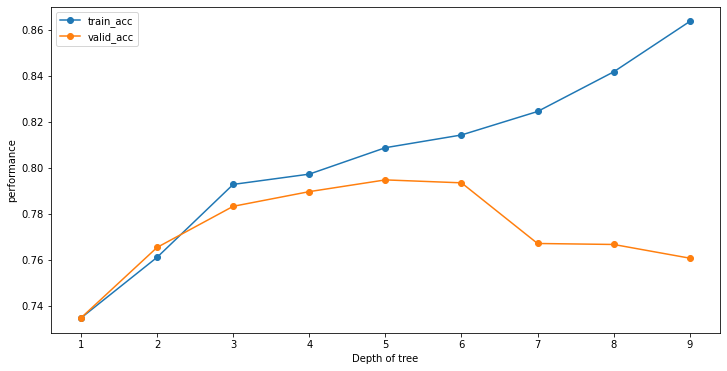

In [645]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o',label='train_acc')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o',label='valid_acc')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [647]:
from sklearn import tree

In [648]:
dot_data = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=xtrain.columns,filled=True) 

In [649]:
!dot -Tpng tree.dot -o tree.png

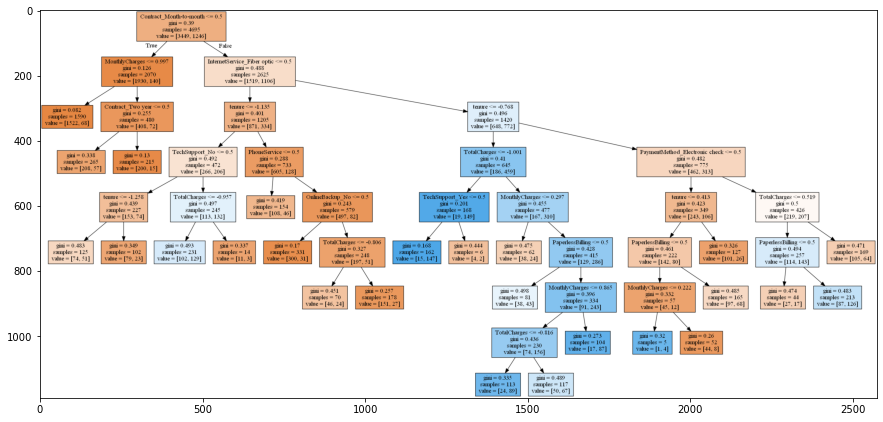

In [650]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)